TITANIC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')


In [ ]:
trainset.shape

(891, 12)

In [ ]:
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping Name column

In [ ]:
trainset.drop(['Name'], axis = 1,inplace=True)

Checking for empty values

In [ ]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping the 2 rows which have null values in embarked column

In [ ]:
trainset.dropna(subset=['Embarked'],inplace=True)

In [ ]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
trainset['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

Assigning a class 'U' for missing values in cabin colum

In [ ]:
trainset['Cabin']=trainset['Cabin'].fillna('U')

In [ ]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Replacing missing values in age column with the mean of all other values in the  age column

In [ ]:
trainset['Age']=trainset['Age'].replace(np.NaN,trainset['Age'].mean())

In [ ]:
trainset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
trainset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,U,S


Dropping Ticket Column

In [ ]:
trainset.drop(['Ticket'], axis = 1,inplace=True)

In [ ]:
trainset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,U,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,U,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,U,S


In [ ]:
trainset.columns=["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
#this had to be done otherwise, was getting keyerror while label encoding

Label Encoding Sex column

In [ ]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
trainset['Sex'] = LabelEncoder().fit_transform(trainset['Sex'])

In [ ]:
trainset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,U,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,U,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,U,S


Dropping PassengerId Column

In [ ]:
trainset.drop(['PassengerId'], axis = 1,inplace=True)

In [ ]:
trainset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,U,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,U,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,U,S


Take just the first character in cabin colum and assign it to a new column named "Deck"

In [ ]:
trainset["Deck"] = trainset["Cabin"].str.slice(0,1)

In [ ]:
trainset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,U,S,U
1,1,1,0,38.0,1,0,71.2833,C85,C,C
2,1,3,0,26.0,0,0,7.9250,U,S,U
3,1,1,0,35.0,1,0,53.1000,C123,S,C
4,0,3,1,35.0,0,0,8.0500,U,S,U


Dropping Cabin Column

In [ ]:
trainset.drop(['Cabin'], axis = 1,inplace=True)

In [ ]:
trainset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,S,U
1,1,1,0,38.0,1,0,71.2833,C,C
2,1,3,0,26.0,0,0,7.9250,S,U
3,1,1,0,35.0,1,0,53.1000,S,C
4,0,3,1,35.0,0,0,8.0500,S,U


Checking number of unique values in emarked and decked column

In [ ]:
print(trainset['Deck'].unique())
print(trainset['Embarked'].unique())

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q']


Creating X and Y

In [ ]:
X=trainset.iloc[:,1:]
y=trainset.iloc[:,0]

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare Embarked Deck
0         3    1  22.000000      1      0   7.2500        S    U
1         1    0  38.000000      1      0  71.2833        C    C
2         3    0  26.000000      0      0   7.9250        S    U
3         1    0  35.000000      1      0  53.1000        S    C
4         3    1  35.000000      0      0   8.0500        S    U
..      ...  ...        ...    ...    ...      ...      ...  ...
886       2    1  27.000000      0      0  13.0000        S    U
887       1    0  19.000000      0      0  30.0000        S    B
888       3    0  29.642093      1      2  23.4500        S    U
889       1    1  26.000000      0      0  30.0000        C    C
890       3    1  32.000000      0      0   7.7500        Q    U

[889 rows x 8 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


Onehot encoding

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  ...  Deck_F  Deck_G  Deck_T  Deck_U
0         3    1  22.000000      1  ...       0       0       0       1
1         1    0  38.000000      1  ...       0       0       0       0
2         3    0  26.000000      0  ...       0       0       0       1
3         1    0  35.000000      1  ...       0       0       0       0
4         3    1  35.000000      0  ...       0       0       0       1
..      ...  ...        ...    ...  ...     ...     ...     ...     ...
886       2    1  27.000000      0  ...       0       0       0       1
887       1    0  19.000000      0  ...       0       0       0       0
888       3    0  29.642093      1  ...       0       0       0       1
889       1    1  26.000000      0  ...       0       0       0       0
890       3    1  32.000000      0  ...       0       0       0       1

[889 rows x 16 columns]


Seeing which features are most important

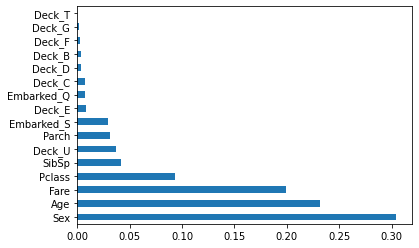

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [ ]:
X.drop(['Deck_E','Embarked_Q','Deck_C','Deck_D','Deck_F','Deck_B','Deck_G','Deck_T'], axis = 1,inplace=True)

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_S  Deck_U
0         3    1  22.000000      1      0   7.2500           1       1
1         1    0  38.000000      1      0  71.2833           0       0
2         3    0  26.000000      0      0   7.9250           1       1
3         1    0  35.000000      1      0  53.1000           1       0
4         3    1  35.000000      0      0   8.0500           1       1
..      ...  ...        ...    ...    ...      ...         ...     ...
886       2    1  27.000000      0      0  13.0000           1       1
887       1    0  19.000000      0      0  30.0000           1       0
888       3    0  29.642093      1      2  23.4500           1       1
889       1    1  26.000000      0      0  30.0000           0       0
890       3    1  32.000000      0      0   7.7500           0       1

[889 rows x 8 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Working on test set now

In [ ]:
testset.drop(['Name'], axis = 1,inplace=True)

In [ ]:
testset.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testset['Cabin']=testset['Cabin'].fillna('U')

In [ ]:
testset['Age']=testset['Age'].replace(np.NaN,trainset['Age'].mean())

In [ ]:
testset.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
testset['Fare']=testset['Fare'].replace(np.NaN,trainset['Fare'].mean())

In [ ]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,U,Q
1,893,3,female,47.0,1,0,363272,7.0000,U,S
2,894,2,male,62.0,0,0,240276,9.6875,U,Q
3,895,3,male,27.0,0,0,315154,8.6625,U,S
4,896,3,female,22.0,1,1,3101298,12.2875,U,S


In [ ]:
testset.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
testset.drop(['Ticket'], axis = 1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
testset['Sex'] = LabelEncoder().fit_transform(testset['Sex'])

In [ ]:
testset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,U,Q
1,893,3,0,47.0,1,0,7.0000,U,S
2,894,2,1,62.0,0,0,9.6875,U,Q
3,895,3,1,27.0,0,0,8.6625,U,S
4,896,3,0,22.0,1,1,12.2875,U,S


In [ ]:
testset.drop(['PassengerId'], axis = 1,inplace=True)

In [ ]:
testset["Deck"] = testset["Cabin"].str.slice(0,1)

In [ ]:
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,3,1,34.5,0,0,7.8292,U,Q,U
1,3,0,47.0,1,0,7.0000,U,S,U
2,2,1,62.0,0,0,9.6875,U,Q,U
3,3,1,27.0,0,0,8.6625,U,S,U
4,3,0,22.0,1,1,12.2875,U,S,U


In [ ]:
testset.drop(['Cabin'], axis = 1,inplace=True)

In [ ]:
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,1,34.5,0,0,7.8292,Q,U
1,3,0,47.0,1,0,7.0000,S,U
2,2,1,62.0,0,0,9.6875,Q,U
3,3,1,27.0,0,0,8.6625,S,U
4,3,0,22.0,1,1,12.2875,S,U


In [ ]:
X_test=testset.iloc[:,0:]

In [ ]:
print(X_test)

     Pclass  Sex        Age  SibSp  Parch      Fare Embarked Deck
0         3    1  34.500000      0      0    7.8292        Q    U
1         3    0  47.000000      1      0    7.0000        S    U
2         2    1  62.000000      0      0    9.6875        Q    U
3         3    1  27.000000      0      0    8.6625        S    U
4         3    0  22.000000      1      1   12.2875        S    U
..      ...  ...        ...    ...    ...       ...      ...  ...
413       3    1  29.642093      0      0    8.0500        S    U
414       1    0  39.000000      0      0  108.9000        C    C
415       3    1  38.500000      0      0    7.2500        S    U
416       3    1  29.642093      0      0    8.0500        S    U
417       3    1  29.642093      1      1   22.3583        C    U

[418 rows x 8 columns]


In [ ]:
X_test=pd.get_dummies(X_test,drop_first=True)

In [ ]:
print(X_test)

     Pclass  Sex        Age  SibSp  ...  Deck_E  Deck_F  Deck_G  Deck_U
0         3    1  34.500000      0  ...       0       0       0       1
1         3    0  47.000000      1  ...       0       0       0       1
2         2    1  62.000000      0  ...       0       0       0       1
3         3    1  27.000000      0  ...       0       0       0       1
4         3    0  22.000000      1  ...       0       0       0       1
..      ...  ...        ...    ...  ...     ...     ...     ...     ...
413       3    1  29.642093      0  ...       0       0       0       1
414       1    0  39.000000      0  ...       0       0       0       0
415       3    1  38.500000      0  ...       0       0       0       1
416       3    1  29.642093      0  ...       0       0       0       1
417       3    1  29.642093      1  ...       0       0       0       1

[418 rows x 15 columns]


In [ ]:
X_test.drop(['Deck_E','Embarked_Q','Deck_C','Deck_D','Deck_F','Deck_B','Deck_G'], axis = 1,inplace=True)

In [ ]:
print(X_test)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked_S  Deck_U
0         3    1  34.500000      0      0    7.8292           0       1
1         3    0  47.000000      1      0    7.0000           1       1
2         2    1  62.000000      0      0    9.6875           0       1
3         3    1  27.000000      0      0    8.6625           1       1
4         3    0  22.000000      1      1   12.2875           1       1
..      ...  ...        ...    ...    ...       ...         ...     ...
413       3    1  29.642093      0      0    8.0500           1       1
414       1    0  39.000000      0      0  108.9000           0       0
415       3    1  38.500000      0      0    7.2500           1       1
416       3    1  29.642093      0      0    8.0500           1       1
417       3    1  29.642093      1      1   22.3583           0       1

[418 rows x 8 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)

In [ ]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
len(y_pred)

418

In [ ]:
result_data = pd.read_csv("gender_submission.csv")
output = pd.DataFrame({'PassengerId': result_data.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)

NOW MAKING PREDICTIONS WITH DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy')
classifier1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred1=classifier1.predict(X_test)

In [ ]:
print(y_pred1)

[0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [ ]:
result_data1 = pd.read_csv("gender_submission.csv")
output = pd.DataFrame({'PassengerId': result_data.PassengerId, 'Survived': y_pred1})
output.to_csv('my_submission1.csv', index=False)

Using Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
classifier2=GaussianNB()
classifier2.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
y_pred2=classifier2.predict(X_test)

In [71]:
print(y_pred2)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 0]


In [72]:
result_data2 = pd.read_csv("gender_submission.csv")
output = pd.DataFrame({'PassengerId': result_data.PassengerId, 'Survived': y_pred2})
output.to_csv('my_submission2.csv', index=False)

Using Kernel SVM

In [73]:
from sklearn.svm import SVC
classifier3=SVC(kernel='rbf')
classifier3.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_pred3=classifier3.predict(X_test)

In [75]:
print(y_pred3)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [76]:
result_data3 = pd.read_csv("gender_submission.csv")
output = pd.DataFrame({'PassengerId': result_data.PassengerId, 'Survived': y_pred3})
output.to_csv('my_submission3.csv', index=False)

SVM model

In [77]:
from sklearn.svm import SVC
classifier4=SVC(kernel='linear')
classifier4.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
y_pred4=classifier4.predict(X_test)
print(y_pred4)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [79]:
result_data4 = pd.read_csv("gender_submission.csv")
output = pd.DataFrame({'PassengerId': result_data.PassengerId, 'Survived': y_pred4})
output.to_csv('my_submission4.csv', index=False)